# **A1.1 Aprendizaje estadístico-automático**

---

### **Exploración inicial de los datos**

En este reporte se trabajara con una version simplificada de los datos de estudio recopilados en Colombia, Peru y Mexico acerca de la obesidad disponibles en el *UCI Machine Learning Repository*. Esta version esta conformada por 2111 registros, conteniendo cada uno informacion acerca de los siguentes atributos de la persona:

*   Sexo - Hombre/Mujer
*   Edad - Numero
*   Estatura - Numero en metros
*   Peso - Numero en kg
*   Familiar con Sobrepeso - Si/No
*   Come Muchas Calorias - Si/No
*   Come Vegetales - Indice(1-3)
*   Fumador - Si/No
*   Consumo de Agua - Indice(1-3)
*   Nivel de Obesidad - Categorica (Normal/Sobrepeso/Obesidad)

El objetivo es analizar la relación entre características físicas, hábitos de vida y el nivel de obesidad de las personas.






In [ ]:
#Carga de datos desde el archivo A1.1 Obesidad.csv

import pandas as pd

file_path = '/content/A1.1 Obesidad.csv'

df = pd.read_csv(file_path)
display(df)

,Sexo,Edad,Estatura,Peso,FamiliarConSobrepeso,ComeMuchasCalorias,ComeVegetales,Fumador,ConsumoDeAgua,NivelDeObesidad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,no,2.000000,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,yes,3.000000,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,no,2.000000,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,no,2.000000,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,no,2.000000,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,no,1.728139,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,no,2.005130,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,no,2.054193,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,no,2.852339,Obesity_Type_III


### **Reflexión sobre el diseño del estudio**
Como parte del equipo de investigación sería relevante plantear una variable relacionada con problemas metabólicos diagnosticados previamente en la persona. Propongo incorporar la variable Problema Metabólico de tipo binario, esta variable ayudaría a identificar a las personas que han sido diagnosticadas con alguna de estas condiciones:


*   Resistencia a la insulina.
*   Síndrome metabólico.
*   Trastornos hormonales relacionados con el metabolismo.
*   Prediabetes o diabetes tipo 2.
*   Alguna otra condición relacionada con alteraciones metabólicas.


Esta variable junto con las ya planteadas en la investigación facilitará la identificación de diferencias entre individuos. Logrando analizar el impacto de las condiciones metabólicas sobre los niveles de obesidad de las personas y reconocer su influencia en el peso de una persona.


### **Definición de una variable de interés para inferencia**
Asumiendo el rol de líder del proyecto, se define la variable Nivel de Obesidad como variable de salida para el estudio de inferencia. Se selecciona esta variable porque representa una clasificación del estado de una persona considerando toda la información relacionada a su salud como el peso, la estatura, hábitos de consumo, entre otros. En comparación con el resto de variables el Nivel de Obesidad es adecuado para realizar comparaciones y encontrar relaciones con el resto de variables analizadas.


La variable Nivel de Obesidad es una variable categórica, la cual representa el estado de una persona. A partir de la siguiente gráfica de distribución podemos observar que la variable se divide en categorías de obesidad, sobrepeso, peso normal y peso insuficiente cada una con sus respectivos niveles. Además podemos observar que la mayoría de personas pertenece a las categorías de obesidad y sobrepeso, permitiendo identificar la magnitud del problema de la obesidad dentro de los datos proporcionados.



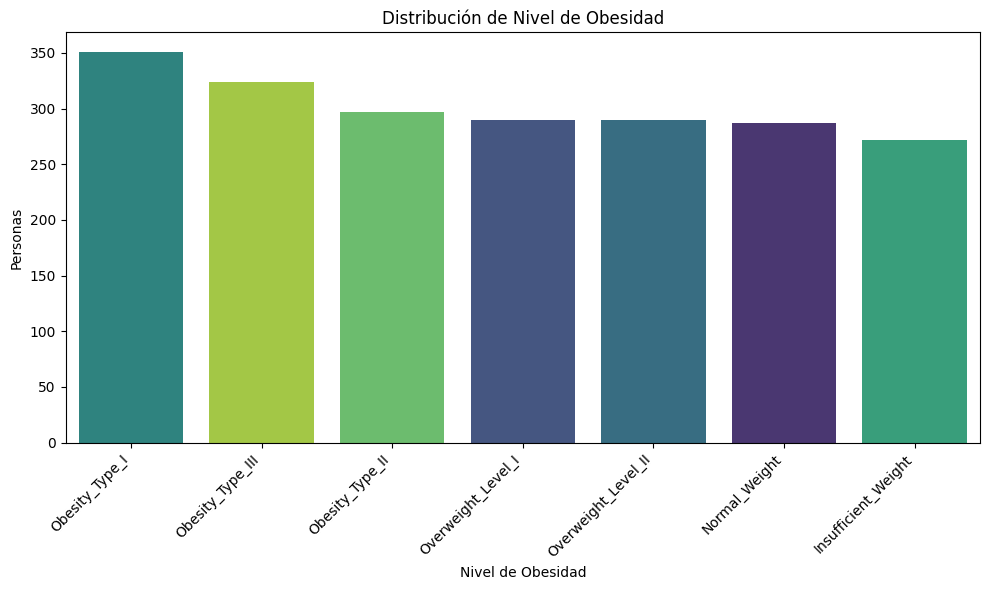

In [ ]:
#Grafica de Distribución de Nivel de Obesidad

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(
  data=df,
  x='NivelDeObesidad',
  hue='NivelDeObesidad',
  palette='viridis',
  order=df['NivelDeObesidad'].value_counts().index,
  legend=False)

plt.title('Distribución de Nivel de Obesidad')
plt.xlabel('Nivel de Obesidad')
plt.ylabel('Personas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Análisis gráfico enfocado en una subpoblación**

Para este analisis se selecciono una subpoblacion femenina, con el objetivo de analizar la relacion entre las variables de peso y nivel de obesidad. En la gráfica se observa que el peso aumenta conforme el nivel de obesidad es mayor. Las personas con peso normal presentan valores más bajos, mientras que en las categorías de sobrepeso y obesidad el peso tiende a ser más alto. En los niveles más altos de obesidad se aprecia una mayor variabilidad en el peso.

Este resultado concuerda con la forma en que se clasifica la obesidad y ayuda a identificar patrones generales en los datos para futuros análisis.

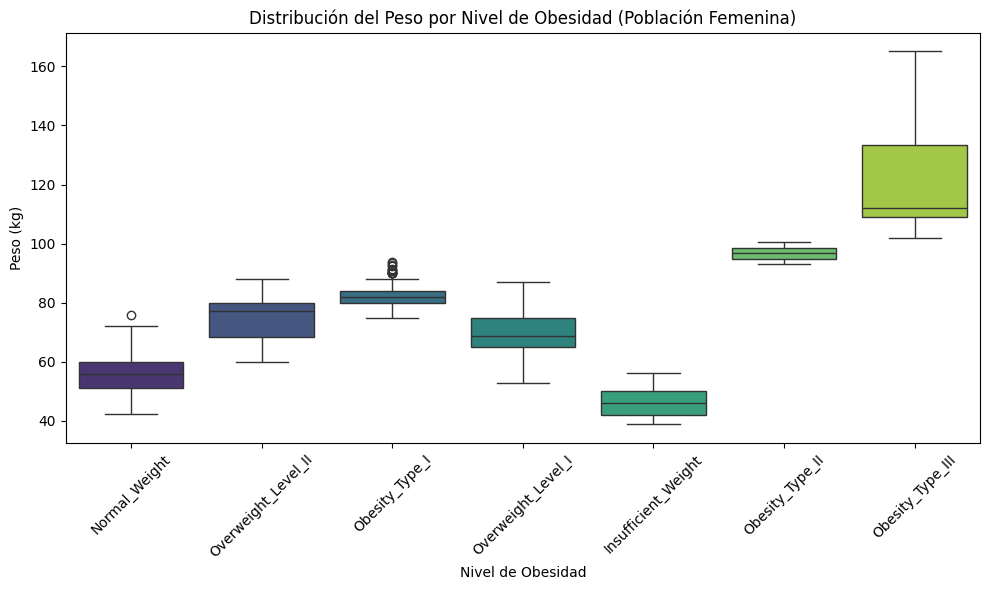

In [ ]:
#Grafica de Distribución del Peso por Nivel de Obesidad (Población Femenina)
import seaborn as sns
import matplotlib.pyplot as plt

df_femenino = df[df["Sexo"] == "Female"]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_femenino,
    x="NivelDeObesidad",
    y="Peso",
    hue="NivelDeObesidad",
    palette="viridis",
    legend=False
)

plt.title("Distribución del Peso por Nivel de Obesidad (Población Femenina)")
plt.xlabel("Nivel de Obesidad")
plt.ylabel("Peso (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Referencias:

- OpenAI. (2024). ChatGPT (modelo de lenguaje de inteligencia artificial). https://chat.openai.com/